 ## Product Sales Forecasting

### Problem Statement:
- In the competitive retail industry, the ability to predict future sales accurately is crucial for operational and strategic planning. Product sales forecasting aims to estimate the number of products a store will sell in the future, based on various influencing factors such as store type, location, regional characteristics, promotional activities, and temporal variations (such as holidays and seasons).
- This project focuses on developing a predictive model that uses historical sales data from different stores to forecast sales for upcoming periods.

### Data Dictionary:
- ID: Unique identifier for each record in the dataset.
- Store_id: Unique identifier for each store.
- Store_Type: Categorization of the store based on its type.
- Location_Type: Classification of the store's location (e.g., urban, suburban).
- Region_Code: Code representing the geographical region where the store is located.
- Date: The specific date on which the data was recorded.
- Holiday: Indicator of whether the date was a holiday (1: Yes, 0: No).
- Discount: Indicates whether a discount was offered on the given date (Yes/No).
- Order: The number of orders received by the store on the specified day.
- Sales: Total sales amount for the store on the given day.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings # supress warnings
warnings.filterwarnings('ignore')

In [2]:
#importing data 
train_df = pd.read_csv('D:/Scaler/csv/Project/TRAIN.csv')
test_df = pd.read_csv('D:/Scaler/csv/Project/TEST_FINAL.csv')
test_df_cpy = test_df.copy()

In [3]:
train_df.head(5)

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [4]:
test_df.head(5)

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount
0,T1188341,171,S4,L2,R3,2019-06-01,0,No
1,T1188342,172,S1,L1,R1,2019-06-01,0,No
2,T1188343,173,S4,L2,R1,2019-06-01,0,No
3,T1188344,174,S1,L1,R4,2019-06-01,0,No
4,T1188345,170,S1,L1,R2,2019-06-01,0,No


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             188340 non-null  object 
 1   Store_id       188340 non-null  int64  
 2   Store_Type     188340 non-null  object 
 3   Location_Type  188340 non-null  object 
 4   Region_Code    188340 non-null  object 
 5   Date           188340 non-null  object 
 6   Holiday        188340 non-null  int64  
 7   Discount       188340 non-null  object 
 8   #Order         188340 non-null  int64  
 9   Sales          188340 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 14.4+ MB


In [6]:
train_df.nunique()

ID               188340
Store_id            365
Store_Type            4
Location_Type         5
Region_Code           4
Date                516
Holiday               2
Discount              2
#Order              299
Sales             47422
dtype: int64

In [7]:
train_df.drop(['ID'],axis=1,inplace=True)
test_df.drop(['ID'],axis=1,inplace=True)

In [8]:
train_df.shape

(188340, 9)

In [9]:
test_df.shape

(22265, 7)

In [10]:
train_df.describe()

,Store_id,Holiday,#Order,Sales
count,188340.000000,188340.000000,188340.000000,188340.000000
mean,183.000000,0.131783,68.205692,42784.327982
std,105.366308,0.338256,30.467415,18456.708302
min,1.000000,0.000000,0.000000,0.000000
25%,92.000000,0.000000,48.000000,30426.000000
50%,183.000000,0.000000,63.000000,39678.000000
75%,274.000000,0.000000,82.000000,51909.000000
max,365.000000,1.000000,371.000000,247215.000000


In [11]:
train_df.describe(include = "object")

,Store_Type,Location_Type,Region_Code,Date,Discount
count,188340,188340,188340,188340,188340
unique,4,5,4,516,2
top,S1,L1,R1,2018-01-01,No
freq,88752,85140,63984,365,104051


In [12]:
# Do we have duplicates?
print('Number of duplicates:', len(train_df[train_df.duplicated()]))

# Do we have missing values?
print('Number of missing values:', train_df.isnull().sum().sum())

Number of duplicates: 0
Number of missing values: 0


No Duplicate values present in data

<Axes: xlabel='Store_Type', ylabel='count'>

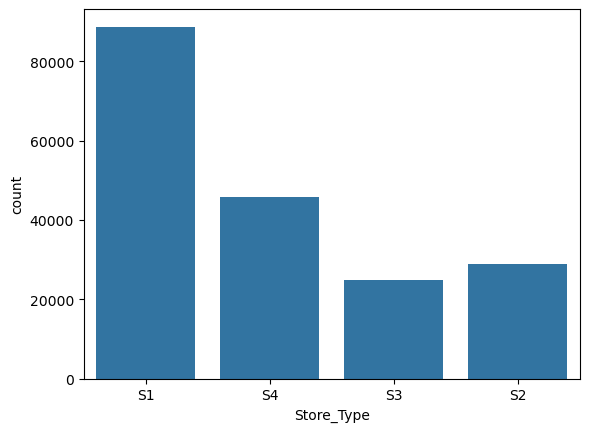

In [13]:
sns.countplot(data = train_df, x = "Store_Type")

S1 store has higher numbers as compared to other store.

In [14]:
# Location Type -
train_df["Location_Type"].value_counts()

Location_Type
L1    85140
L2    48504
L3    29928
L5    13932
L4    10836
Name: count, dtype: int64

<Axes: xlabel='Location_Type', ylabel='count'>

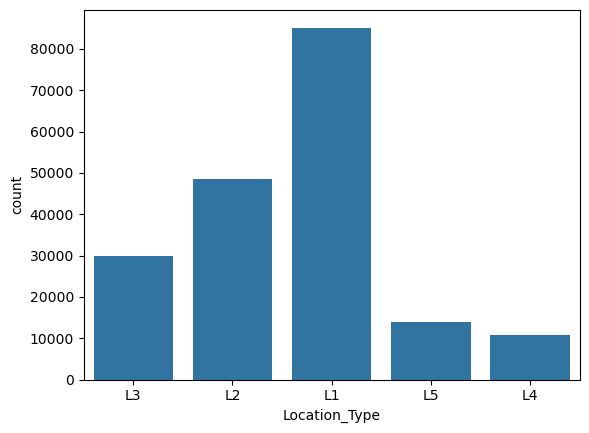

In [15]:
sns.countplot(data = train_df, x = "Location_Type")

In [16]:
# Discounts -
train_df["Discount"].value_counts(normalize = True) * 100

Discount
No     55.246363
Yes    44.753637
Name: proportion, dtype: float64

<Axes: xlabel='Discount', ylabel='count'>

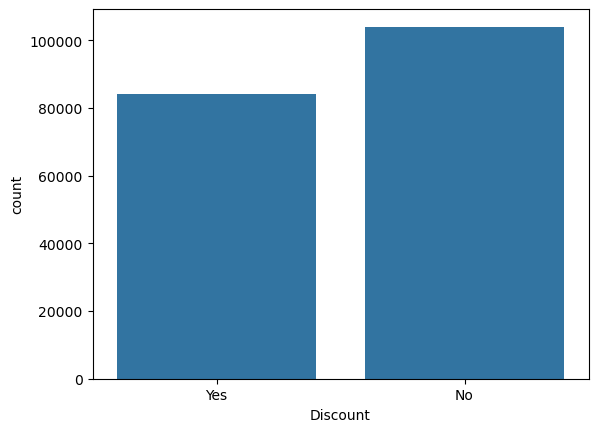

In [17]:
sns.countplot(data = train_df, x = "Discount")

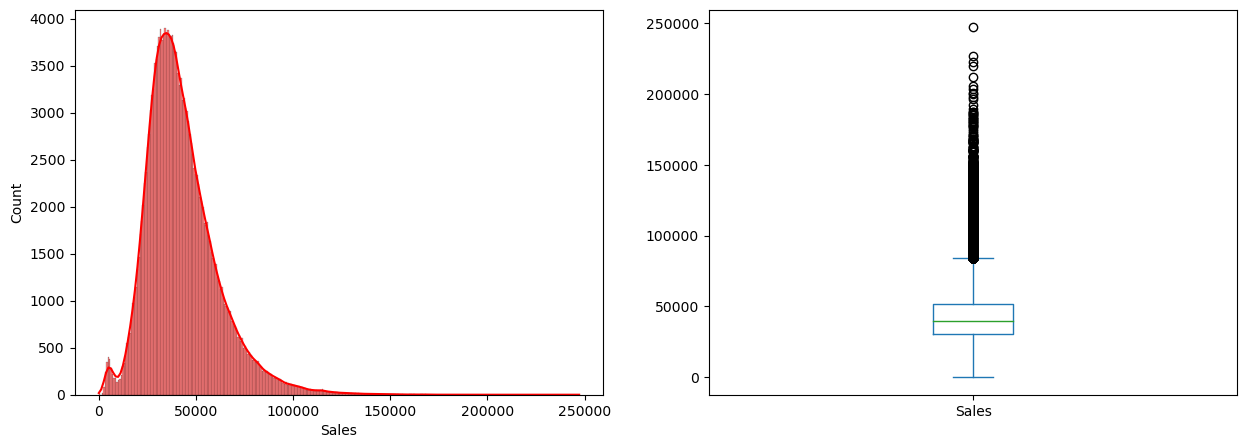

In [18]:
# Distribution of Sales -

plt.figure(figsize = (15, 5))

plt.subplot(121)
sns.histplot(data = train_df, x = "Sales", kde = True, color = "Red")

plt.subplot(122)
train_df["Sales"].plot.box()

plt.show()

- Max Sales happens between 30K - 50K. from above plot we can see that graph is left Skewed.
- Boxplot shows presence of outliers in the dataset.

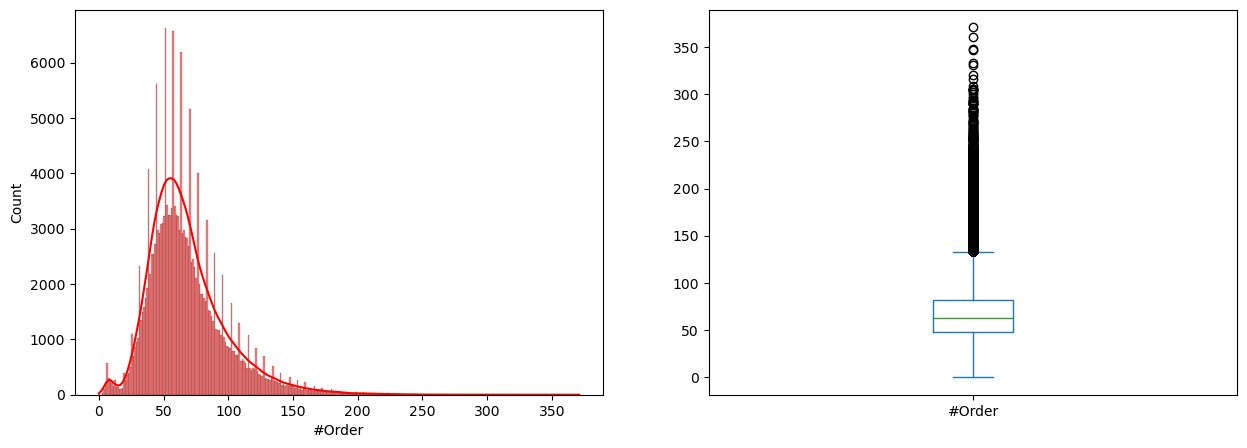

In [19]:
# Distribution of orders -

plt.figure(figsize = (15, 5))

plt.subplot(121)
sns.histplot(data = train_df, x = "#Order", kde = True, color = "Red")

plt.subplot(122)
train_df["#Order"].plot.box()

plt.show()

- Max order count are between 40 -70. from above plot we can see that graph is left Skewed.
- Boxplot shows presence of outliers in the dataset.

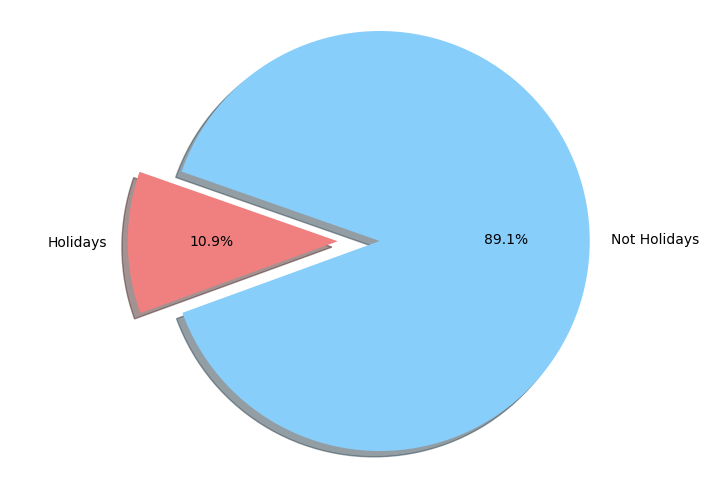

In [20]:
# Holidays Distribution
holiday = train_df.groupby(['Holiday'], as_index=False)['Sales'].sum()    
holiday['Holiday'] = holiday['Holiday'].astype(str)

# Visualization
fig = plt.figure(figsize =(9, 6))

plt.pie(holiday['Sales'], 
        explode=(0.2, 0), 
        labels=['Not Holidays', 'Holidays'], 
        colors= ['lightskyblue', 'lightcoral'],
        autopct='%1.1f%%', 
        shadow=True, 
        startangle=200)
        
plt.axis('equal')
plt.show()

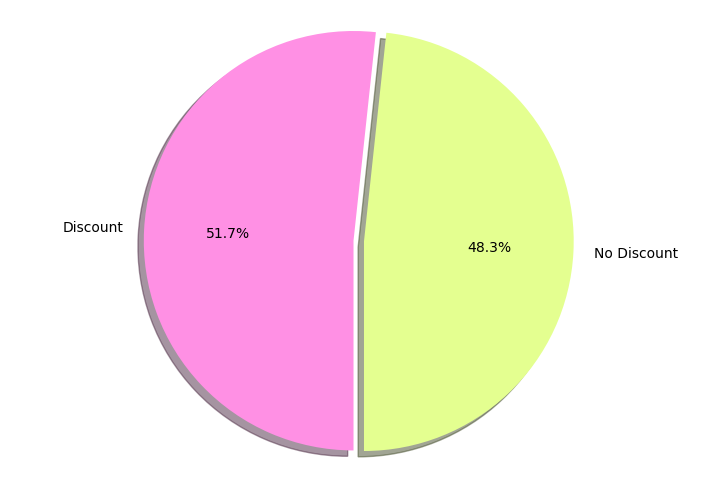

In [21]:
# Discount distribution
discount = train_df.groupby(['Discount'], as_index=False)['Sales'].sum()    
discount['Discount'] = discount['Discount'].astype(str)
discount.head()

# Visualization
fig = plt.figure(figsize =(9, 6))
plt.pie(discount['Sales'], 
        labels=['No Discount', 'Discount'], 
        explode=(0.05, 0),
        colors= ['#e4ff90', '#ff90e4'],
        autopct='%1.1f%%', 
        shadow=True, 
        startangle=270)
        
plt.axis('equal')
plt.show()


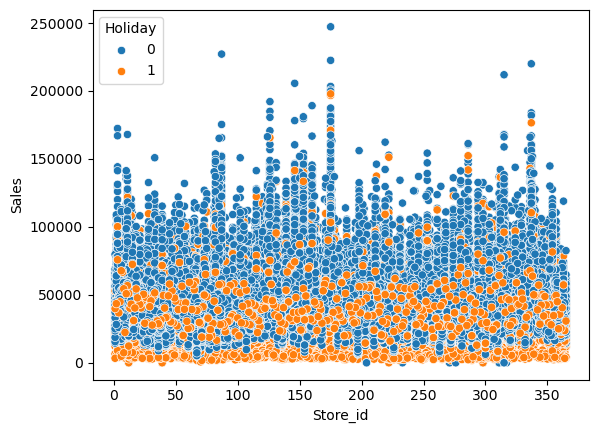

In [22]:
# Scatterplot of Sales vs store_id (hue as Holiday)
sns.scatterplot(x = "Store_id", y = "Sales", hue = "Holiday", data = train_df)
plt.show()

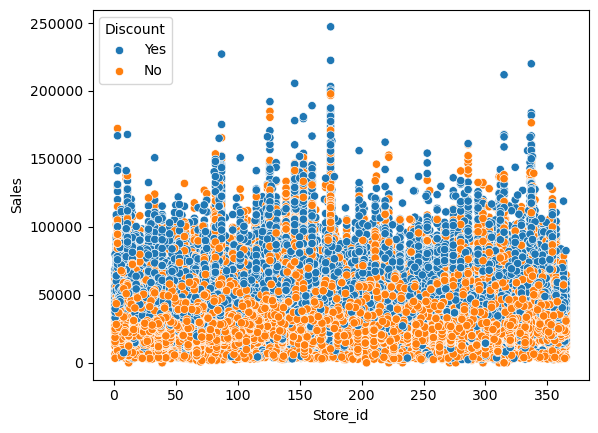

In [23]:
# Scatterplot of Sales vs store_id (hue as Discount)
sns.scatterplot(x = "Store_id", y = "Sales", hue = "Discount", data = train_df)
plt.show()

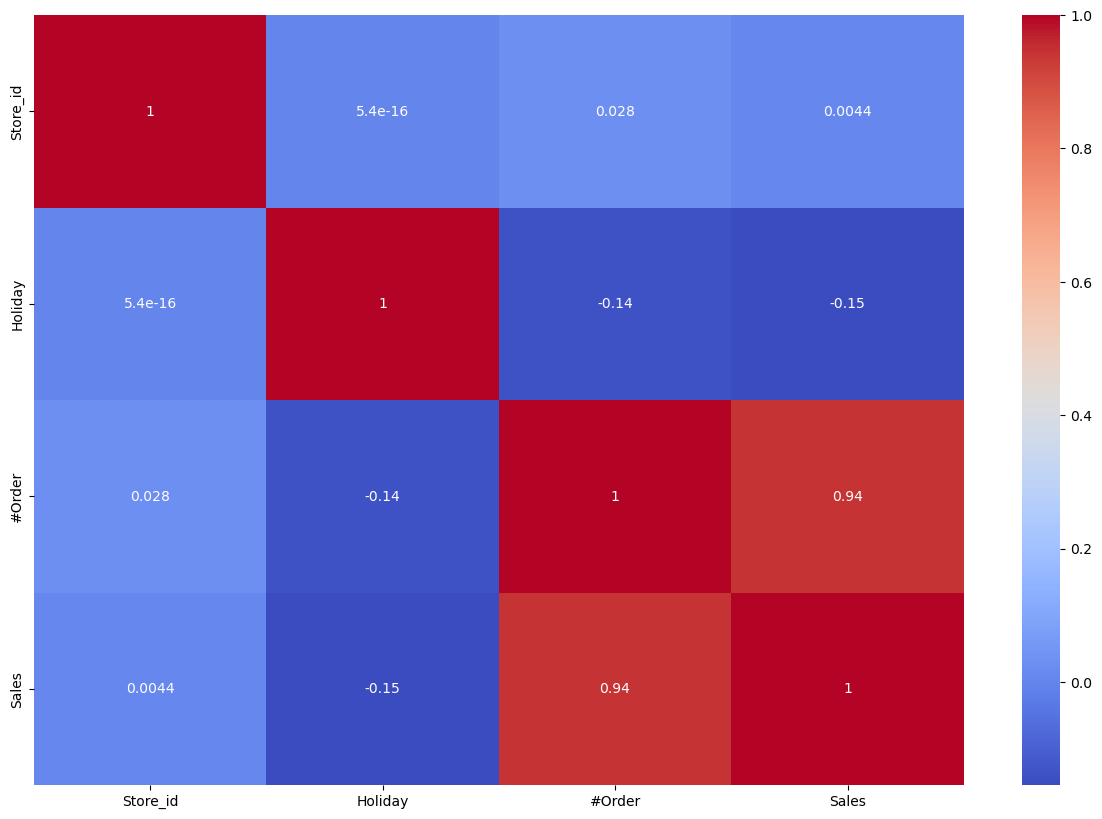

In [24]:
# Correlation amongst different features -
plt.figure(figsize = (15, 10))
numeric_df = train_df.select_dtypes(include=[np.number])
# Compute the correlation matrix
corr_matrix = numeric_df.corr(method='pearson')
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

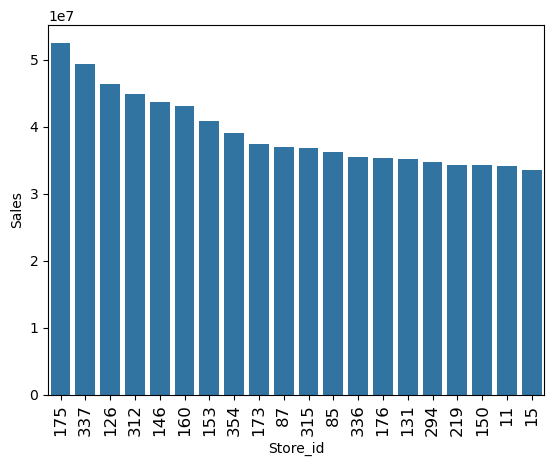

In [25]:
# Group by 'Store_id' and sum the 'Sales' for each store
best_stores = train_df.groupby('Store_id', as_index=False)['Sales'].sum()

# Sort the stores by total sales in descending order
best_stores = best_stores.sort_values(by='Sales', ascending=False)

# Select the top 20 stores with the highest sales
top_20_stores = best_stores.head(20)

# Convert 'Store_id' to string type
top_20_stores['Store_id'] = top_20_stores['Store_id'].astype(str)

# Optionally, reset index if needed
top_20_stores.reset_index(drop=True, inplace=True)

# Display the plot
sns.barplot(x = "Store_id", y = "Sales", data = top_20_stores, estimator = np.sum)
plt.xticks(rotation = 90, fontsize = 12)
plt.show()


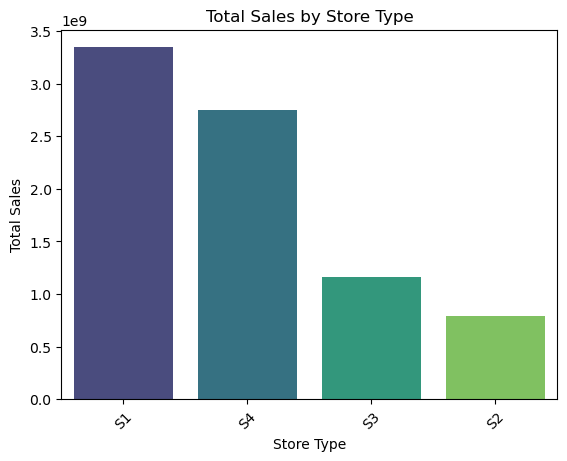

In [26]:
# Group by 'Store_Type' and sum the 'Sales' for each type
sales_by_store_type = train_df.groupby('Store_Type', as_index=False)['Sales'].sum()

# Sort the store types by total sales in descending order
sales_by_store_type = sales_by_store_type.sort_values(by='Sales', ascending=False)

# Convert 'Store_Type' to string type
sales_by_store_type['Store_Type'] = sales_by_store_type['Store_Type'].astype(str)

# Create a bar plot with 'Store_Type' on the x-axis and 'Sales' on the y-axis
sns.barplot(x='Store_Type', y='Sales', data=sales_by_store_type, estimator=np.sum, palette='viridis')

# Add labels and title for clarity
plt.xlabel('Store Type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Store Type')

# Show the plot
plt.xticks(rotation=45)  # Rotate x labels if needed for better readability
plt.show()


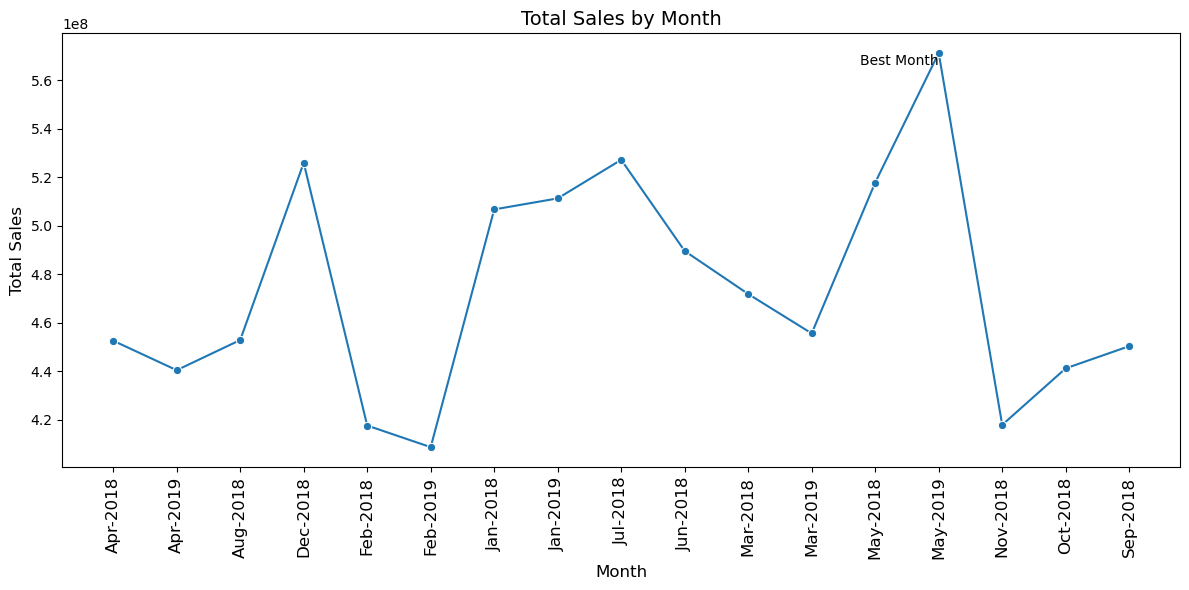

In [27]:
# Convert the 'Date' column to datetime format
train_df['Date'] = pd.to_datetime(train_df['Date'])

# Create a copy of the DataFrame and extract month-year information
best_month = train_df.copy()
best_month['Month'] = best_month['Date'].dt.strftime('%b-%Y')

# Group by 'Month' and sum the 'Sales'
best_month_sales = best_month.groupby('Month', as_index=False)['Sales'].sum()

# Create a line plot with 'Month' on the x-axis and 'Sales' on the y-axis
plt.figure(figsize=(12, 6))  # Adjust figure size for better readability
sns.lineplot(x='Month', y='Sales', data=best_month_sales, marker='o')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, fontsize=12)

# Add annotations for the best month
plt.text(x=13, y=566000000, s="Best Month", fontsize=10, ha='right')

# Add labels and title for clarity
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.title('Total Sales by Month', fontsize=14)

# Show the plot
plt.tight_layout()  # Adjust layout to ensure everything fits
plt.show()


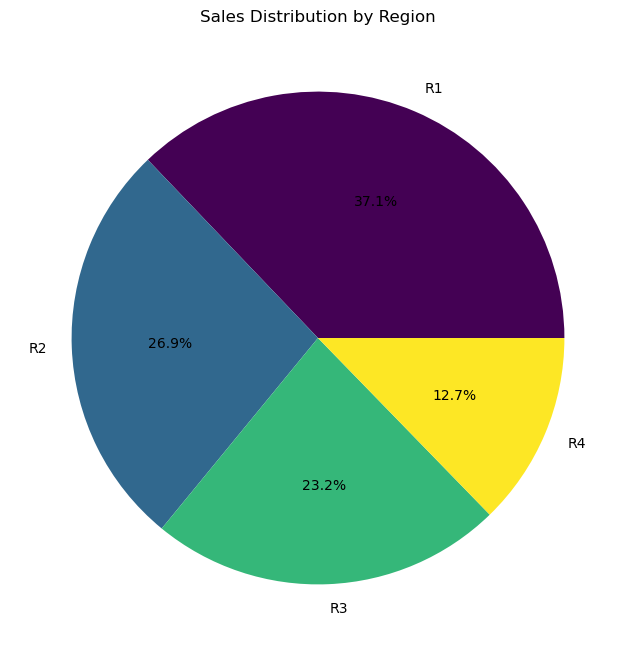

In [28]:
# Group by 'Region_Code' and sum the 'Sales' for each region
best_region = train_df.groupby('Region_Code', as_index=False)['Sales'].sum()

# Convert 'Region_Code' to string type
best_region['Region_Code'] = best_region['Region_Code'].astype(str)

# Plot a pie chart
plt.figure(figsize=(10, 8))
plt.pie(best_region['Sales'], labels=best_region['Region_Code'], autopct='%1.1f%%', colors=plt.cm.viridis(np.linspace(0, 1, len(best_region))))

# Add title
plt.title('Sales Distribution by Region')

# Show the plot
plt.show()


### Hypothesis Testing

In [29]:
from scipy.stats import ttest_1samp, ttest_ind
import scipy.stats as stats
from scipy.stats import chisquare    # statistical test (chistat, pvalue)
from scipy.stats import chi2_contingency  # when expected value has to be computed
from scipy.stats import chi2  # distribution


from scipy.stats import f_oneway, kruskal    # Numeric vs categorical for many categories
from scipy.stats import ttest_ind     # Numeric vs categorical
from scipy.stats import shapiro     # Test Gaussian :-  50 to 200 samples
from scipy.stats import levene     # Test variance
from scipy.stats import ks_2samp
from statsmodels.graphics.gofplots import qqplot


from scipy.stats import spearmanr, ttest_rel

In [30]:
# Check if 'Sales' is numeric and 'Discount' is categorical
print(train_df['Sales'].dtype)
print(train_df['Discount'].dtype)

float64
object


In [31]:
# Convert 'Sales' to numeric if it's not already
train_df['Sales'] = pd.to_numeric(train_df['Sales'], errors='coerce')

# Drop rows with missing 'Sales' values if any
train_df.dropna(subset=['Sales'], inplace=True)

# Extract sales data based on discount
discount_sales = train_df[train_df['Discount'] == 'Yes']['Sales']
non_discount_sales = train_df[train_df['Discount'] == 'No']['Sales']

# Perform the t-test for independent samples
t_stat, p_value = ttest_ind(discount_sales, non_discount_sales, alternative='greater')

# Print the p-value
print(f'p-value: {p_value}')

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: Stores offering discounts have significantly higher sales.")
else:
    print("Fail to reject the null hypothesis: No significant difference in sales between stores offering discounts and those not offering discounts.")

p-value: 0.0
Reject the null hypothesis: Stores offering discounts have significantly higher sales.


In [32]:
# Extract sales data based on holiday
holiday_sales = train_df[train_df['Holiday'] == 1]['Sales']
non_holiday_sales = train_df[train_df['Holiday'] == 0]['Sales']

# Perform the t-test for independent samples
t_stat, p_value = ttest_ind(holiday_sales, non_holiday_sales, alternative='greater')

# Print the t-statistic and p-value
print(f'T-statistic: {t_stat}')
print(f'p-value: {p_value}')

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: Sales on holidays are significantly higher than sales on non-holidays.")
else:
    print("Fail to reject the null hypothesis: No significant difference in sales between holidays and non-holidays.")


T-statistic: -67.99011744850168
p-value: 1.0
Fail to reject the null hypothesis: No significant difference in sales between holidays and non-holidays.


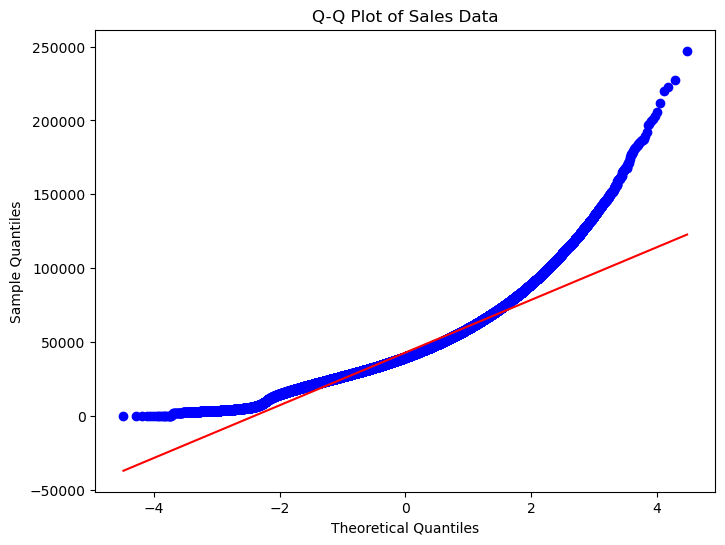

In [33]:
# Create a Q-Q plot
total_sale = train_df["Sales"]
plt.figure(figsize=(8, 6))
stats.probplot(total_sale, dist="norm", plot=plt)
plt.title('Q-Q Plot of Sales Data')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')

# Show the plot
plt.show()

The line is not straight, indicating that the data does not follow a Gaussian distribution.

## Insights from the Analysis:
**Total Sales and Quantity:**
- The total quantity sold amounts to 12,845,860 units.
- Total sales reach approximately 8,058,000,332 (in the specified currency).

**Seasonal Sales Patterns:**
- Significant declines in sales are observed around June 2018 and December 2018, indicating potential seasonal effects or specific events impacting these periods.
  
**Top Performing Stores:**
- Store S1 at Location L1 leads with the highest sales, exceeding 2 billion units.
- Store S4 at Location L1 also performs strongly, approaching 2 billion units, while other store-location combinations show comparatively lower sales figures.
- 
**Impact of Discounts on Sales:**
- Sales without discounts total approximately 4.17 billion.
- Sales with discounts amount to around 3.89 billion, suggesting that a substantial portion of sales occurs without discounts.
  
**Regional Sales Performance:**
- Region R1 outperforms in both sales and number of orders, followed by Regions R2, R3, and R4.
- Variations in sales and orders are noted across regions, with visual representations highlighting the relative volumes.

**Correlation Between Orders and Sales by Store Type:**
- A positive correlation is observed between the number of orders and sales across different store types.
- Store S1 (blue) records the highest sales and orders, followed by Store S4 (orange), Store S2 (green), and Store S3 (yellow).

## Recommendations Based on Insights
**Set Realistic Sales Targets:**
- Establish future sales targets grounded in the current baseline figures to ensure achievable goals.

**Optimize Sales Strategies:**
- Revise sales strategies and operational processes to align more closely with forecasted sales, aiming to reduce any discrepancies between projections and actual outcomes.

**Leverage Best Practices:**
- Investigate the successful practices of Store S1 and Store S4 and consider implementing these strategies across other stores to boost their performance.

**Plan for Seasonal Variations:**
- Anticipate reduced sales during holidays and adjust resource allocation and sales strategies accordingly.

**Refine Discount Strategies:**
- Balance the use of discounts to attract customers while maintaining profitability, based on insights from discount impact analysis.

**Monitor Sales Patterns:**
- Track weekly sales patterns to identify and capitalize on peak sales periods, optimizing scheduling and inventory management.